In [321]:
import pandas as pd
import numpy as np
import scipy.stats as st
from statsmodels.sandbox.stats.multicomp import multipletests

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [323]:
browser = pd.read_csv('ab_browser_test.csv')

* userID:  уникальный идентификатор пользователя
* browser:  браузер, который использовал userID
* slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
* n_clicks: количество кликов, которые пользоваль совершил за n_queries
* n_queries: количество запросов, который совершил userID, пользуясь браузером browser
* n_nonclk_queries: количество запросов пользователя, в которых  им не было совершено ни одного клика

In [324]:
browser.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [325]:
browser.shape

(566134, 6)

In [6]:
browser.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


In [7]:
browser.describe(include='object')

,browser,slot
count,566134,566134
unique,6,2
top,Browser #4,control
freq,156833,284554


In [8]:
browser['slot'].value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

In [21]:
sum_of_clicks = browser.groupby('slot').agg({'n_clicks' : 'sum'})
sum_of_clicks

,n_clicks
slot,
control,3210027
exp,3261823


In [20]:
persent_cl = sum_of_clicks.loc['exp'] / sum_of_clicks.loc['control'] * 100
persent_cl.round(3) 

n_clicks    101.614
dtype: float64

In [326]:
(persent_cl - 100).round(3) 

n_clicks    1.614
dtype: float64

In [22]:
control_click = browser[browser['slot'] == 'control']['n_clicks'].values
exp_click = browser[browser['slot'] == 'exp']['n_clicks'].values

In [65]:
def bootstrap(data, samples):
    n = np.random.randint(0, len(data), size = (samples, len(data)))
    samples = data[n]
    return samples    

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [68]:
mean_control_click = list(map(np.mean, bootstrap(control_click, 1000)))
mean_exp_click = list(map(np.mean, bootstrap(exp_click, 1000)))
median_control_click = list(map(np.median, bootstrap(control_click, 1000)))
median_exp_click = list(map(np.median, bootstrap(exp_click, 1000)))

In [69]:
print('bootstrap intervals for mean control clicks: {}'.format(stat_intervals(mean_control_click, 0.05)))
print('bootstrap intervals for mean exp. clicks: {}'.format(stat_intervals(mean_exp_click, 0.05)))
print('bootstrap intervals for median control clicks: {}'.format(stat_intervals(median_control_click, 0.05)))
print('bootstrap intervals for median exp. clicks: {}'.format(stat_intervals(median_exp_click, 0.05)))

bootstrap intervals for mean control clicks: [11.20187161 11.35377731]
bootstrap intervals for mean exp. clicks: [11.50520545 11.65614399]
bootstrap intervals for median control clicks: [4. 4.]
bootstrap intervals for median exp. clicks: [5. 5.]


In [73]:
delta_mean_scores = list(map(lambda x: x[0] - x[1], zip(mean_exp_click, mean_control_click)))
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(median_exp_click, median_control_click)))

In [75]:
print('bootstrap delta for means: {}'.format(stat_intervals(delta_mean_scores, 0.05)))
print('bootstrap delta for medians: {}'.format(stat_intervals(delta_median_scores, 0.05)))

bootstrap delta for means: [0.19969191 0.40682606]
bootstrap delta for medians: [1. 1.]


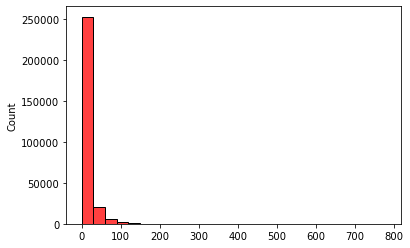

In [94]:
sns.histplot(exp_click, binwidth=30, color='red')

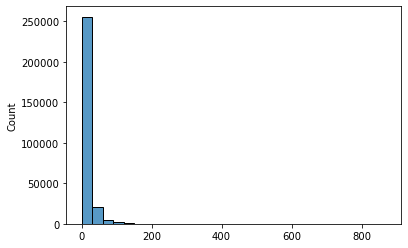

In [93]:
sns.histplot(control_click, binwidth=30)

In [233]:
%%time
np.random.seed(0)
control_boot_chi_squared = list(map(lambda x: [np.mean(x), np.var(x, ddof=1)], \
                                    bootstrap(control_click, 500)))

Wall time: 9.06 s


In [234]:
means = np.array(control_boot_chi_squared)[:, 0]

In [235]:
var = np.array(control_boot_chi_squared)[:, 1]

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

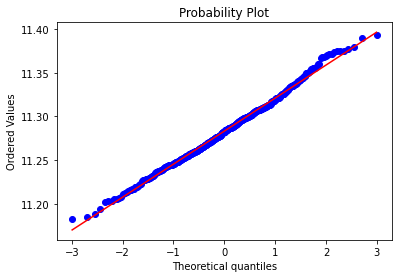

In [236]:
st.probplot(means, plot=plt)

In [230]:
browser['slot'].value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

((array([282301.08823052, 282512.70968151, 282631.75042717, 282716.17888969,
         282782.3450597 , 282837.12445286, 282884.08540284, 282925.32718789,
         282962.19330369, 282995.59740261, 283026.19007273, 283054.45161344,
         283080.74708391, 283105.36069051, 283128.51819018, 283150.40200679,
         283171.16173792, 283190.92164617, 283209.78611976, 283227.84373074,
         283245.17030322, 283261.83126848, 283277.88349787, 283293.37674667,
         283308.35480452, 283322.85642111, 283336.91605832, 283350.56450624,
         283363.82939197, 283376.73560265, 283389.30563983, 283401.55991797,
         283413.51701739, 283425.19389989, 283436.60609342, 283447.76785089,
         283458.69228763, 283469.39150054, 283479.87667212, 283490.1581613 ,
         283500.24558336, 283510.1478802 , 283519.87338258, 283529.42986513,
         283538.82459547, 283548.06437779, 283557.15559197, 283566.10422857,
         283574.91592026, 283583.59597014, 283592.14937729, 283600.58085989,

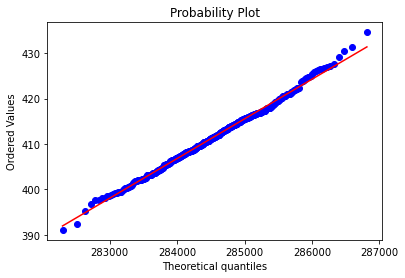

In [237]:
st.probplot(var, dist="chi2", sparams=(284554-1), plot=plt)

Тест Манн-Уитни

In [266]:
df_control = browser.query('slot == "control"').groupby('userID').agg({'n_clicks' : 'sum'})
df_exp = browser.query('slot == "exp"').groupby('userID').agg({'n_clicks' : 'sum'})

In [256]:
df_exp.head()

,userID,n_clicks
0,1,23
1,3,3
2,5,29
3,7,54
4,9,6


In [253]:
df_control.shape

(284392, 2)

In [254]:
browser['slot'].value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

In [259]:
st.mannwhitneyu(df_exp, df_control, alternative='two-sided')

MannwhitneyuResult(statistic=41140868471.0, pvalue=8.694294377520879e-75)

In [267]:
df_control_browser = browser.query('slot == "control"').groupby(['browser', 'userID']).agg({'n_clicks' : 'sum'})
df_exp_browser = browser.query('slot == "exp"').groupby(['browser', 'userID']).agg({'n_clicks' : 'sum'})

In [294]:
mann_w_table = []
for i in browser['browser'].unique():
    a = df_control_browser.loc[i]
    b = df_exp_browser.loc[i]
    stat, p = st.mannwhitneyu(a, b, alternative='two-sided')
    mann_w_table.append([i, stat, p])
    print('{} mann-whitney stat {}, {}'.format(i, stat, p))

Browser #2 mann-whitney stat 1522572720.0, 0.0544877208394482
Browser #4 mann-whitney stat 3072447765.0, 0.8152123531690997
Browser #14 mann-whitney stat 806984730.5, 0.0
Browser #17 mann-whitney stat 131389681.0, 0.07480120286021603
Browser #20 mann-whitney stat 143791805.0, 0.9073331277747075
Browser #22 mann-whitney stat 2557723040.5, 0.5148110304420064


In [297]:
mann_w_table = pd.DataFrame.from_records(mann_w_table, columns=['browser', 'stat', 'p'])

In [306]:
rej, p_adj, a, b = multipletests(mann_w_table.p, alpha = 0.05, method = 'holm')
mann_w_table['p_adj'] = p_adj
mann_w_table

,browser,stat,p,p_adj
0,Browser #2,1.522573e+09,0.054488,0.272439
1,Browser #4,3.072448e+09,0.815212,1.000000
2,Browser #14,8.069847e+08,0.000000,0.000000
3,Browser #17,1.313897e+08,0.074801,0.299205
4,Browser #20,1.437918e+08,0.907333,1.000000
5,Browser #22,2.557723e+09,0.514811,1.000000


In [313]:
nonclk_rate = browser.groupby(['slot', 'browser']).agg({'n_nonclk_queries' : 'sum', 'n_queries' : 'sum'})

In [319]:
nonclk_rate['nonclk_rate'] = round((nonclk_rate['n_nonclk_queries']/nonclk_rate['n_queries'])*100, 2)

In [320]:
nonclk_rate

n_nonclk_queries  n_queries  nonclk_rate
slot    browser                                              
control Browser #14            161252     279998        57.59
        Browser #17             75837     208921        36.30
        Browser #2             260259     566239        45.96
        Browser #20             78548     193752        40.54
        Browser #22            315470     777135        40.59
        Browser #4             498254    1060771        46.97
exp     Browser #14            123656     282606        43.76
        Browser #17             77614     210123        36.94
        Browser #2             246514     548019        44.98
        Browser #20             72998     187283        38.98
        Browser #22            296177     743156        39.85
        Browser #4             456508    1011250        45.14